# Naive Bayes Classifier
### Naive Bayes Classification works on the principles of conditional probability as given by the Bayes' Theorem
* Classification under Supervised Learning
* Advantage
  * Simple and easy to implement
  * Needs less training data
  * handles both continuous and discrete data
  * highly scalable with number of predictors and data points
  * It is fast so that can be used in real time prediction
  * Not sensitive to irrelevant feature
* Disadvantage
  * The Zero-Frequency Problem, a new feature occurs in test data set, probability will be zero

### Bayes Theorem
Bayes' Theorem gives the conditional probability of an event A given another event B has occurred

<img src="Image/Naive_Bayes.JPG"  width="600" height="300">

### Application of Naive Bayes Classifier
* Face Recognition (eye? nose?)
* Weather Prediction (raining? sunny?)
* Medical Diagnosis (high risk? not high risk?)
* News Classification (world news? political news?)

### Shopping Demo
To predict whether a person will purchase a product on a specific combination of Day, Discount and Free Delivery using Naive Bayes Classifier

<img src="Image/Naive_Bayes2.JPG"  width="600" height="300">
Data format

<img src="Image/Naive_Bayes3.JPG"  width="600" height="300">
Based on the dataset containing three input types of Day, Discount and Free Delivery, weill populate frequency tables for each attribute

<img src="Image/Naive_Bayes4.JPG"  width="600" height="300">
Now let's calculate the Likelihood table for one of the variable

<img src="Image/Naive_Bayes5.JPG"  width="600" height="300">
Based on the likelihood table, we calculate conditional probabilities

<img src="Image/Naive_Bayes6.JPG"  width="600" height="300">
If Condition is Holiday with Discount and Free Delivery

<img src="Image/Naive_Bayes7.JPG"  width="600" height="300">

### Use Case - Text Classification using Naive Bayes
To perform text classification of News Headlines and classify news into different topics for a News Website

### 1. Importing the libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from sklearn.datasets import fetch_20newsgroups

### 2. Fetching the whole dataset

In [10]:
data = fetch_20newsgroups()

In [17]:
type(data)

sklearn.utils._bunch.Bunch

In [15]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

### 3. Defining all the categories

In [30]:
categories = data.target_names
# fetching the training set
train = fetch_20newsgroups(subset = 'train', categories=categories)
# fetching the test set
test =  fetch_20newsgroups(subset = 'test', categories=categories)
# checking number of training and test records
print(len(train.data))
print(len(test.data))

11314
7532


In [28]:
# checking a data record
print(train.data[5])

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

### 4. Tokenizing Text
Tokenization is a common task a data scientist comes across when working with text data. It consists of splitting an entire text into small units, also known as tokens. Most Natural Language Processing (NLP) projects have tokenization as the first step because it's the foundation for developing good models and helps better understand the text we have.

5 Methods:
1. Simple tokenization with .split
2. Tokenization with NLTK
3. Convert a corpus to a vector of token counts with Count Vectorizer (sklearn)
4. Tokenize text in different languages with spaCy
5. Tokenization with Ge

We use TfidVertorizer from sklearn in this projectnsim

# 5. Fitting Multinomial Naive Bayes Model to Training set

In [34]:
# Importing necessary packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
# Creating a model based on Multinomial Naive Bayes
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
# Training the model
model.fit(train.data, train.target)

### 6. Predicting test set

In [35]:
# Creating labels for the test data (y_pred)
labels = model.predict(test.data)
labels

array([ 7, 11,  0, ...,  9,  3, 15], dtype=int64)

### 7. Creating confusion matrix and heat map

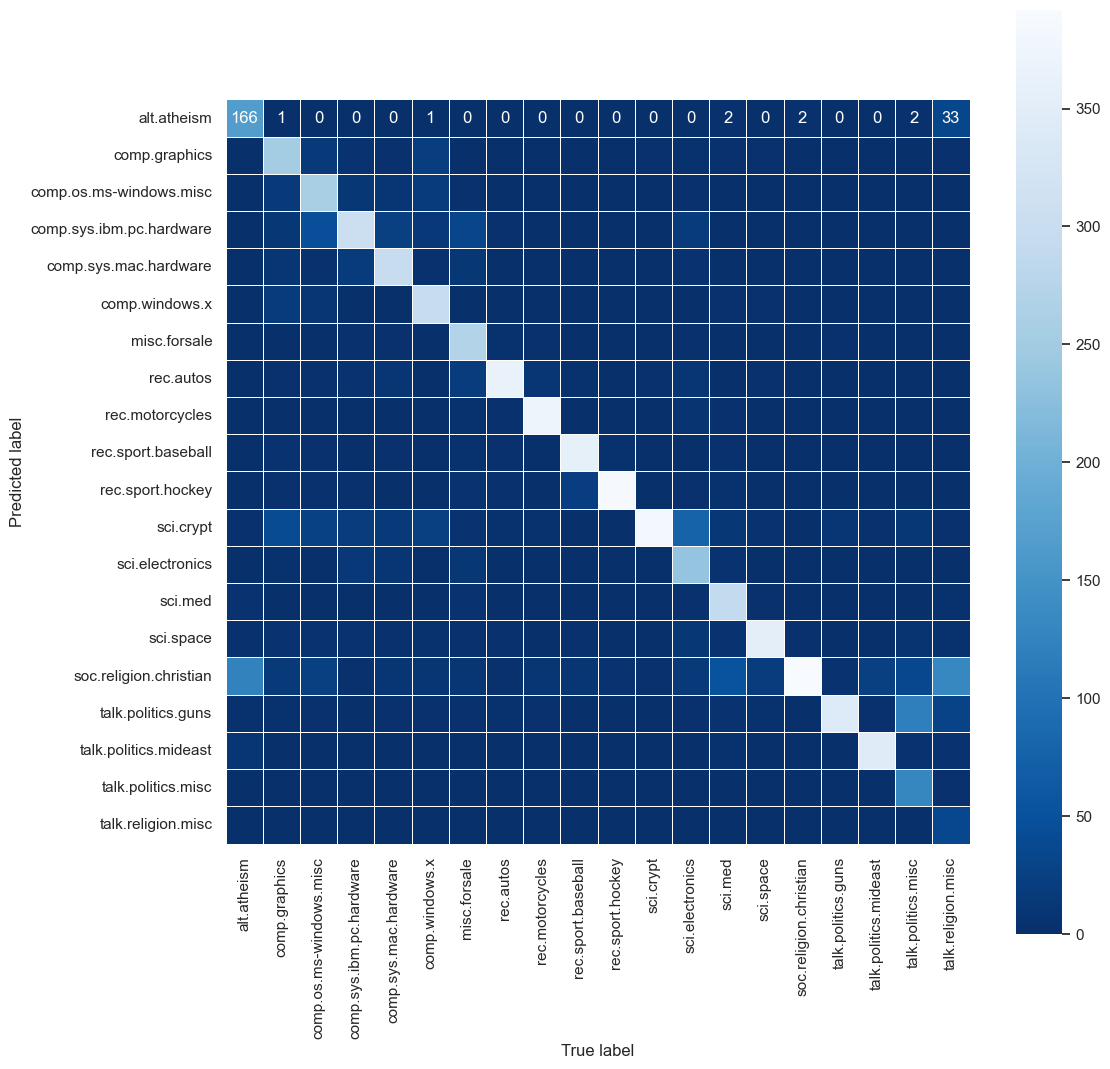

In [46]:
from sklearn.metrics import confusion_matrix
# confusion_matrix(y_test, y_pred)
cm = confusion_matrix(test.target, labels)

plt.figure(figsize=(12,12))
sns.heatmap(cm.T, square=True, annot=True, fmt='d', xticklabels=categories, yticklabels=categories, linewidth=.5, cmap = "Blues_r")

plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

### 8. Performance

In [70]:
from sklearn.metrics import accuracy_score, f1_score
accuray = accuracy_score(labels, test.target)
f1 = f1_score(labels, test.target, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.7738980350504514
F1 Score: 0.7793503544114374


### Predicting category on new data based on trained model

In [56]:
def predict_category(s, model=model):
    #[s] here, converting string to list
    pred = model.predict([s])
    return categories[pred[0]]

In [57]:
predict_category('Jesus Christ')

'soc.religion.christian'

In [68]:
predict_category('Australian')

'talk.politics.guns'

In [64]:
predict_category('Tesla is better than BMW')

'rec.motorcycles'